In [59]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
from dash import dcc, html, Input, Output, callback
import dash_bootstrap_components as dbc
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon
from matplotlib.collections import PatchCollection




In [4]:
data =  pd.read_csv('bdc_us_mobile_broadband_summary_by_geography_J25_30dec2025.csv')
data.head(5)

,area_data_type,geography_type,geography_id,geography_desc,total_area,mobilebb_3g_area_st_pct,mobilebb_3g_area_iv_pct,mobilebb_4g_area_st_pct,mobilebb_4g_area_iv_pct,mobilebb_5g_spd1_area_st_pct,mobilebb_5g_spd1_area_iv_pct,mobilebb_5g_spd2_area_st_pct,mobilebb_5g_spd2_area_iv_pct
0,Total,National,99,National,9.754824e+06,0.044304,0.030436,0.694594,0.458888,0.498238,0.263329,0.386171,0.179066
1,Total,State,01,Alabama,1.370274e+05,0.000000,0.000000,0.944804,0.634106,0.638194,0.319964,0.472573,0.236973
2,Total,State,02,Alaska,1.846753e+06,0.073956,0.048265,0.082765,0.034033,0.017791,0.006395,0.008757,0.003202
3,Total,State,04,Arizona,2.573078e+05,0.032192,0.021776,0.726136,0.383538,0.409708,0.186351,0.324239,0.126109
4,Total,State,05,Arkansas,1.310934e+05,0.000000,0.000000,0.913444,0.527464,0.662201,0.323019,0.486016,0.231967


In [17]:
data.shape

(20784, 13)

In [47]:
state_data = data[data['geography_type'] == 'State']
state_data = state_data.iloc[:,2:12]
state_data.head(5)

,geography_id,geography_desc,total_area,mobilebb_3g_area_st_pct,mobilebb_3g_area_iv_pct,mobilebb_4g_area_st_pct,mobilebb_4g_area_iv_pct,mobilebb_5g_spd1_area_st_pct,mobilebb_5g_spd1_area_iv_pct,mobilebb_5g_spd2_area_st_pct
1,01,Alabama,1.370274e+05,0.000000,0.000000,0.944804,0.634106,0.638194,0.319964,0.472573
2,02,Alaska,1.846753e+06,0.073956,0.048265,0.082765,0.034033,0.017791,0.006395,0.008757
3,04,Arizona,2.573078e+05,0.032192,0.021776,0.726136,0.383538,0.409708,0.186351,0.324239
4,05,Arkansas,1.310934e+05,0.000000,0.000000,0.913444,0.527464,0.662201,0.323019,0.486016
5,06,California,3.975136e+05,0.000000,0.000000,0.720037,0.474499,0.563454,0.324350,0.472620


In [37]:
county_data = data[data['geography_type']=='County']
county_data = county_data.iloc[:,2:12]
county_data.head(5)

,geography_id,geography_desc,total_area,mobilebb_3g_area_st_pct,mobilebb_3g_area_iv_pct,mobilebb_4g_area_st_pct,mobilebb_4g_area_iv_pct,mobilebb_5g_spd1_area_st_pct,mobilebb_5g_spd1_area_iv_pct,mobilebb_5g_spd2_area_st_pct
57,01001,"Autauga County, AL",1579.987500,0.0,0.0,0.995333,0.654267,0.868867,0.347867,0.638800
58,01003,"Baldwin County, AL",5165.716465,0.0,0.0,0.933669,0.700237,0.756352,0.516476,0.601260
59,01005,"Barbour County, AL",2407.058290,0.0,0.0,0.967180,0.562533,0.480308,0.139725,0.329730
60,01007,"Bibb County, AL",1630.231102,0.0,0.0,0.966014,0.526006,0.474317,0.123538,0.286683
61,01009,"Blount County, AL",1720.185058,0.0,0.0,0.999143,0.876186,0.945257,0.630274,0.694201


In [38]:
df_states = pd.DataFrame(state_data)
df_counties = pd.DataFrame(county_data)

In [39]:
df_states['4G_pct'] = df_states['mobilebb_4g_area_st_pct'] * 100
df_states['5G_Speed1_pct'] = df_states['mobilebb_5g_spd1_area_st_pct'] * 100
df_states['5G_Speed2_pct'] = df_states['mobilebb_5g_spd2_area_st_pct'] * 100

df_counties['4G_pct'] = df_counties['mobilebb_4g_area_st_pct'] * 100
df_counties['5G_Speed1_pct'] = df_counties['mobilebb_5g_spd1_area_st_pct'] * 100
df_counties['5G_Speed2_pct'] = df_counties['mobilebb_5g_spd2_area_st_pct'] * 100

# Calculate additional metrics
df_states['5G_gap'] = df_states['4G_pct'] - df_states['5G_Speed1_pct']

Text(0.05, 0.95, '\nSTATISTICAL SUMMARY\n\nSTATE LEVEL (n=260):\n4G Coverage:\n  Mean: 86.5%\n  Median: 94.6%\n  Std Dev: 19.2%\n  Range: 5.0% - 100.0%\n\n5G Speed 1:\n  Mean: 70.1%\n  Std Dev: 25.9%\n\nCOUNTY LEVEL (n=12220):\n4G Coverage:\n  Mean: 91.7%\n  Std Dev: 15.9%\n  Range: 0.0% - 100.0%\n')

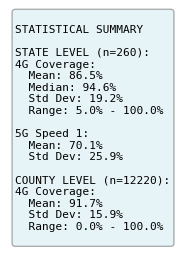

In [60]:
ax_stats = plt.subplot(5, 4, 1)
ax_stats.axis('off')
stats_text = f"""
STATISTICAL SUMMARY

STATE LEVEL (n={len(df_states)}):
4G Coverage:
  Mean: {df_states['4G_pct'].mean():.1f}%
  Median: {df_states['4G_pct'].median():.1f}%
  Std Dev: {df_states['4G_pct'].std():.1f}%
  Range: {df_states['4G_pct'].min():.1f}% - {df_states['4G_pct'].max():.1f}%

5G Speed 1:
  Mean: {df_states['5G_Speed1_pct'].mean():.1f}%
  Std Dev: {df_states['5G_Speed1_pct'].std():.1f}%

COUNTY LEVEL (n={len(df_counties)}):
4G Coverage:
  Mean: {df_counties['4G_pct'].mean():.1f}%
  Std Dev: {df_counties['4G_pct'].std():.1f}%
  Range: {df_counties['4G_pct'].min():.1f}% - {df_counties['4G_pct'].max():.1f}%
"""
ax_stats.text(0.05, 0.95, stats_text, transform=ax_stats.transAxes, 
              fontsize=8, verticalalignment='top', fontfamily='monospace',
              bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

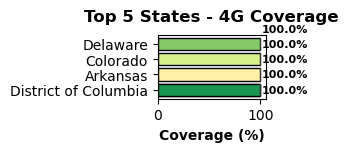

In [61]:
#Top 5 States
ax1 = plt.subplot(5, 4, 5)
top5_4g = df_states.nlargest(5, '4G_pct').sort_values('4G_pct')
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(top5_4g)))
ax1.barh(top5_4g['geography_desc'], top5_4g['4G_pct'], color=colors, edgecolor='black')
ax1.set_xlabel('Coverage (%)', fontweight='bold')
ax1.set_title('Top 5 States - 4G Coverage', fontweight='bold', pad=10)
ax1.set_xlim(0, 105)
for i, (idx, row) in enumerate(top5_4g.iterrows()):
    ax1.text(row['4G_pct'] + 1, i, f"{row['4G_pct']:.1f}%", va='center', fontweight='bold', fontsize=8)
ax1.grid(axis='x', alpha=0.3)

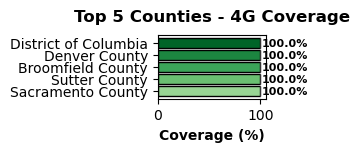

In [62]:
ax2 = plt.subplot(5, 4, 6)
top5_counties_4g = df_counties.nlargest(5, '4G_pct').sort_values('4G_pct')
colors_county = plt.cm.Greens(np.linspace(0.4, 0.9, len(top5_counties_4g)))
ax2.barh([c.split(',')[0] for c in top5_counties_4g['geography_desc']], 
         top5_counties_4g['4G_pct'], color=colors_county, edgecolor='black')
ax2.set_xlabel('Coverage (%)', fontweight='bold')
ax2.set_title('Top 5 Counties - 4G Coverage', fontweight='bold', pad=10)
ax2.set_xlim(0, 105)
for i, (idx, row) in enumerate(top5_counties_4g.iterrows()):
    ax2.text(row['4G_pct'] + 1, i, f"{row['4G_pct']:.1f}%", va='center', fontweight='bold', fontsize=8)
ax2.grid(axis='x', alpha=0.3)

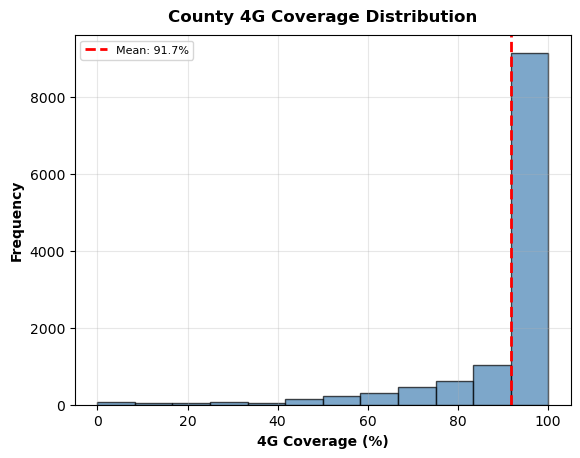

In [83]:
ax3 = plt.subplot(1, 1, 1)
ax3.hist(df_counties['4G_pct'], bins=12, color='steelblue', edgecolor='black', alpha=0.7)
ax3.axvline(df_counties['4G_pct'].mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {df_counties["4G_pct"].mean():.1f}%')
ax3.set_xlabel('4G Coverage (%)', fontweight='bold')
ax3.set_ylabel('Frequency', fontweight='bold')
ax3.set_title('County 4G Coverage Distribution', fontweight='bold', pad=10)
ax3.legend(fontsize=8)
ax3.grid(alpha=0.3)

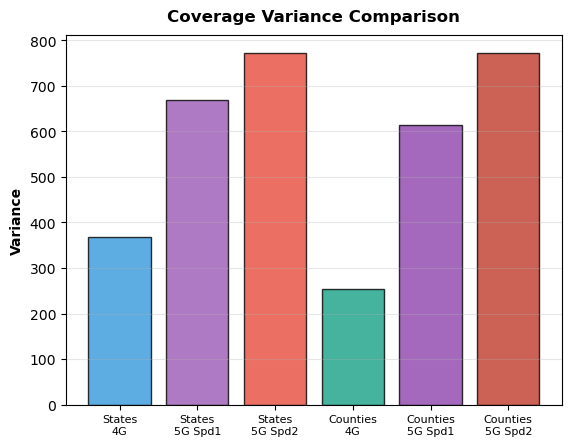

In [82]:
ax15 = plt.subplot(1,1,1)
variance_data = pd.DataFrame({
    'Metric': ['States\n4G', 'States\n5G Spd1', 'States\n5G Spd2', 
               'Counties\n4G', 'Counties\n5G Spd1', 'Counties\n5G Spd2'],
    'Variance': [
        df_states['4G_pct'].var(),
        df_states['5G_Speed1_pct'].var(),
        df_states['5G_Speed2_pct'].var(),
        df_counties['4G_pct'].var(),
        df_counties['5G_Speed1_pct'].var(),
        df_counties['5G_Speed2_pct'].var()
    ]
})
colors_var = ['#3498db', '#9b59b6', '#e74c3c', '#16a085', '#8e44ad', '#c0392b']
ax15.bar(variance_data['Metric'], variance_data['Variance'], color=colors_var, 
        edgecolor='black', alpha=0.8)
ax15.set_ylabel('Variance', fontweight='bold')
ax15.set_title('Coverage Variance Comparison', fontweight='bold', pad=10)
ax15.tick_params(axis='x', labelsize=8)
ax15.grid(axis='y', alpha=0.3)

In [55]:
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

def create_state_choropleth():
    """Create US state choropleth map"""
    fig = go.Figure(data=go.Choropleth(
        locations=[
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI",
    "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN",
    "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
    "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA",
    "WV", "WI", "WY"
],
        z=df_states['4G_pct'],
        locationmode='USA-states',
        colorscale='RdYlGn',
        colorbar_title="4G Coverage %",
        text=df_states['geography_desc'],
        hovertemplate='<b>%{text}</b><br>4G Coverage: %{z:.1f}%<extra></extra>'
    ))
    
    fig.update_layout(
        title_text='US States 4G Coverage Map',
        geo_scope='usa',
        height=500,
        margin=dict(l=0, r=0, t=40, b=0)
    )
    return fig
def create_top_performers():
    """Create top performers bar chart"""
    top5 = df_states.nlargest(5, '4G_pct').sort_values('4G_pct')
    
    fig = go.Figure(go.Bar(
        y=top5['geography_desc'],
        x=top5['4G_pct'],
        orientation='h',
        marker=dict(
            color=top5['4G_pct'],
            colorscale='RdYlGn',
            showscale=False
        ),
        text=top5['4G_pct'].apply(lambda x: f'{x:.1f}%'),
        textposition='outside'
    ))
    
    fig.update_layout(
        title='Top 5 States - 4G Coverage',
        xaxis_title='Coverage (%)',
        yaxis_title='',
        height=400,
        margin=dict(l=150, r=50, t=40, b=40)
    )
    return fig

def create_technology_comparison():
    """Create technology comparison chart"""
    fig = go.Figure()
    
    fig.add_trace(go.Bar(
        name='4G',
        x=df_states['geography_desc'],
        y=df_states['4G_pct'],
        marker_color='#3498db'
    ))
    
    fig.add_trace(go.Bar(
        name='5G Speed 1',
        x=df_states['geography_desc'],
        y=df_states['5G_Speed1_pct'],
        marker_color='#9b59b6'
    ))
    
    fig.add_trace(go.Bar(
        name='5G Speed 2',
        x=df_states['geography_desc'],
        y=df_states['5G_Speed2_pct'],
        marker_color='#e74c3c'
    ))
    
    fig.update_layout(
        title='Technology Coverage Comparison by State',
        xaxis_title='State',
        yaxis_title='Coverage (%)',
        barmode='group',
        height=500,
        xaxis_tickangle=-45,
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )
    return fig
def create_county_top_performers():
    """Create county top performers"""
    top5_counties = df_counties.nlargest(5, '4G_pct').sort_values('4G_pct')
    
    fig = go.Figure(go.Bar(
        y=[c.split(',')[0] for c in top5_counties['geography_desc']],
        x=top5_counties['4G_pct'],
        orientation='h',
        marker=dict(
            color=top5_counties['4G_pct'],
            colorscale='Greens',
            showscale=False
        ),
        text=top5_counties['4G_pct'].apply(lambda x: f'{x:.1f}%'),
        textposition='outside'
    ))
    
    fig.update_layout(
        title='Top 5 Counties - 4G Coverage',
        xaxis_title='Coverage (%)',
        yaxis_title='',
        height=400,
        margin=dict(l=150, r=50, t=40, b=40)
    )
    return fig

def create_distribution_histogram():
    """Create coverage distribution histogram"""
    fig = go.Figure()
    
    fig.add_trace(go.Histogram(
        x=df_states['4G_pct'],
        name='States',
        marker_color='#3498db',
        opacity=0.7,
        nbinsx=15
    ))
    
    fig.add_trace(go.Histogram(
        x=df_counties['4G_pct'],
        name='Counties',
        marker_color='#e67e22',
        opacity=0.7,
        nbinsx=15
    ))
    
    fig.update_layout(
        title='4G Coverage Distribution - States vs Counties',
        xaxis_title='4G Coverage (%)',
        yaxis_title='Frequency',
        barmode='overlay',
        height=400
    )
    return fig

def create_5g_comparison():
    """Create 5G speed comparison scatter"""
    fig = px.scatter(
        df_states,
        x='5G_Speed1_pct',
        y='5G_Speed2_pct',
        size='4G_pct',
        color='4G_pct',
        hover_name='geography_desc',
        labels={
            '5G_Speed1_pct': '5G Speed 1 Coverage (%)',
            '5G_Speed2_pct': '5G Speed 2 Coverage (%)',
            '4G_pct': '4G Coverage (%)'
        },
        color_continuous_scale='Viridis'
    )
    
    # Add trend line
    z = np.polyfit(df_states['5G_Speed1_pct'], df_states['5G_Speed2_pct'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(df_states['5G_Speed1_pct'].min(), df_states['5G_Speed1_pct'].max(), 100)
    
    fig.add_trace(go.Scatter(
        x=x_trend,
        y=p(x_trend),
        mode='lines',
        name='Trend',
        line=dict(color='red', dash='dash', width=2)
    ))
    
    fig.update_layout(
        title='5G Speed 1 vs Speed 2 Coverage',
        height=500
    )
    return fig

def create_correlation_heatmap():
    """Create correlation heatmap"""
    corr_data = df_states[['4G_pct', '5G_Speed1_pct', '5G_Speed2_pct', 'total_area']].corr()
    
    fig = go.Figure(data=go.Heatmap(
        z=corr_data.values,
        x=['4G', '5G Spd1', '5G Spd2', 'Area'],
        y=['4G', '5G Spd1', '5G Spd2', 'Area'],
        colorscale='RdBu',
        zmid=0,
        text=corr_data.values,
        texttemplate='%{text:.2f}',
        textfont={"size": 12},
        colorbar=dict(title="Correlation")
    ))
    
    fig.update_layout(
        title='Coverage Metrics Correlation Matrix',
        height=400
    )
    return fig

def create_coverage_gap():
    """Create coverage gap analysis"""
    gap_data = df_states.nlargest(8, '5G_gap').sort_values('5G_gap')
    
    fig = go.Figure(go.Bar(
        y=gap_data['geography_desc'],
        x=gap_data['5G_gap'],
        orientation='h',
        marker_color='#e67e22',
        text=gap_data['5G_gap'].apply(lambda x: f'{x:.1f}%'),
        textposition='outside'
    ))
    
    fig.update_layout(
        title='States with Largest 4G to 5G Gap',
        xaxis_title='Coverage Gap (4G - 5G Speed 1) %',
        yaxis_title='',
        height=400,
        margin=dict(l=150, r=50, t=40, b=40)
    )
    return fig
def create_area_vs_coverage():
    """Create area vs coverage scatter plot"""
    fig = px.scatter(
        df_states,
        x='total_area',
        y='4G_pct',
        size='5G_Speed1_pct',
        color='5G_Speed1_pct',
        hover_name='geography_desc',
        hover_data={
            'total_area': ':,.0f',
            '4G_pct': ':.1f',
            '5G_Speed1_pct': ':.1f'
        },
        labels={
            'total_area': 'Total Area (sq mi)',
            '4G_pct': '4G Coverage (%)',
            '5G_Speed1_pct': '5G Speed 1 (%)'
        },
        color_continuous_scale='Plasma'
    )
    
    fig.update_layout(
        title='State Area vs Coverage (bubble size = 5G Speed 1)',
        xaxis_type='log',
        height=500
    )
    
    fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
    return fig

In [56]:
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col([
            html.H1("Broadband Coverage Analysis Dashboard", className="text-center mb-4 mt-4"),
            html.P("Interactive analysis of mobile broadband infrastructure across the United States", 
                   className="text-center text-muted mb-4")
        ])
    ]),
    
    # Key Metrics Row
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    html.H4(f"{df_states['4G_pct'].mean():.1f}%", className="card-title text-primary"),
                    html.P("Avg 4G Coverage (States)", className="card-text")
                ])
            ], className="mb-3")
        ], width=3),
        
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    html.H4(f"{df_states['5G_Speed1_pct'].mean():.1f}%", className="card-title text-success"),
                    html.P("Avg 5G Speed 1 (States)", className="card-text")
                ])
            ], className="mb-3")
        ], width=3),
        
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    html.H4(f"{df_counties['4G_pct'].mean():.1f}%", className="card-title text-info"),
                    html.P("Avg 4G Coverage (Counties)", className="card-text")
                ])
            ], className="mb-3")
        ], width=3),
        
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    html.H4(f"{len(df_states)}", className="card-title text-warning"),
                    html.P("States Analyzed", className="card-text")
                ])
            ], className="mb-3")
        ], width=3),
    ]),
    
    # Tabs
    dbc.Tabs([
        dbc.Tab([
            dbc.Row([
                dbc.Col([
                    dcc.Graph(figure=create_state_choropleth())
                ], width=12)
            ], className="mt-3"),
            
            dbc.Row([
                dbc.Col([
                    dcc.Graph(figure=create_top_performers())
                ], width=6),
                
                dbc.Col([
                    dcc.Graph(figure=create_county_top_performers())
                ], width=6)
            ], className="mt-3"),
            
            dbc.Row([
                dbc.Col([
                    dcc.Graph(figure=create_technology_comparison())
                ], width=12)
            ], className="mt-3")
        ], label="Overview", tab_id="overview"),
        
        dbc.Tab([
            dbc.Row([
                dbc.Col([
                    dcc.Graph(figure=create_area_vs_coverage())
                ], width=6),
                
                dbc.Col([
                    dcc.Graph(figure=create_5g_comparison())
                ], width=6)
            ], className="mt-3"),
            
            dbc.Row([
                dbc.Col([
                    dcc.Graph(figure=create_correlation_heatmap())
                ], width=6),
                
                dbc.Col([
                    dcc.Graph(figure=create_distribution_histogram())
                ], width=6)
            ], className="mt-3")
        ], label="Analysis", tab_id="analysis"),
        
        dbc.Tab([
            dbc.Row([
                dbc.Col([
                    dcc.Graph(figure=create_coverage_gap())
                ], width=12)
            ], className="mt-3"),
            
            dbc.Row([
                dbc.Col([
                    dbc.Card([
                        dbc.CardHeader("Key Findings", className="bg-primary text-white"),
                        dbc.CardBody([
                            html.Ul([
                                html.Li(f"Best State: {df_states.loc[df_states['4G_pct'].idxmax(), 'geography_desc']} ({df_states['4G_pct'].max():.1f}%)"),
                                html.Li(f"Worst State: {df_states.loc[df_states['4G_pct'].idxmin(), 'geography_desc']} ({df_states['4G_pct'].min():.1f}%)"),
                                html.Li(f"Average 4G to 5G Gap: {df_states['5G_gap'].mean():.1f}%"),
                                html.Li(f"States with >90% 4G: {len(df_states[df_states['4G_pct'] >= 90])} of {len(df_states)}"),
                                html.Li(f"Correlation (Area vs 4G): {df_states['total_area'].corr(df_states['4G_pct']):.3f}"),
                                html.Li(f"Best County: {df_counties.loc[df_counties['4G_pct'].idxmax(), 'geography_desc']} ({df_counties['4G_pct'].max():.1f}%)"),
                            ])
                        ])
                    ])
                ], width=6),
                
                dbc.Col([
                    dbc.Card([
                        dbc.CardHeader("Statistical Summary", className="bg-success text-white"),
                        dbc.CardBody([
                            html.H6("State-Level Statistics", className="card-subtitle mb-2"),
                            html.P(f"4G - Mean: {df_states['4G_pct'].mean():.1f}%, Median: {df_states['4G_pct'].median():.1f}%, Std: {df_states['4G_pct'].std():.1f}%"),
                            html.P(f"5G Speed 1 - Mean: {df_states['5G_Speed1_pct'].mean():.1f}%, Std: {df_states['5G_Speed1_pct'].std():.1f}%"),
                            html.Hr(),
                            html.H6("County-Level Statistics", className="card-subtitle mb-2"),
                            html.P(f"4G - Mean: {df_counties['4G_pct'].mean():.1f}%, Median: {df_counties['4G_pct'].median():.1f}%, Std: {df_counties['4G_pct'].std():.1f}%"),
                            html.P(f"5G Speed 1 - Mean: {df_counties['5G_Speed1_pct'].mean():.1f}%, Std: {df_counties['5G_Speed1_pct'].std():.1f}%"),
                        ])
                    ])
                ], width=6)
            ], className="mt-3")
        ], label="Insights", tab_id="insights")
    ], id="tabs", active_tab="overview")
], fluid=True)

if __name__ == '__main__':
    app.run(debug=True, port=8050)